In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

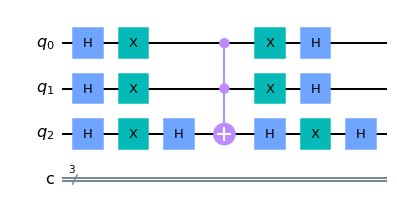

In [2]:
# Creamos la puerta de Grover
Grover = QuantumCircuit(3,3)

Grover.h(range(3))
Grover.x(range(3))

Grover.h(2)
Grover.mct([0,1],2,0)
Grover.h(2)

Grover.x(range(3))
Grover.h(range(3))

Grover.draw()

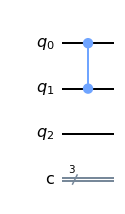

In [4]:
# Creamos el detector
# En este caso invertirá la amplitud de los estados 011 y 111.
Detector = QuantumCircuit(3,3)

Detector.cz(1,0)
Detector.draw()

<ipython-input-5-b6a071062500>:4: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = circ + Detector
/opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:933: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


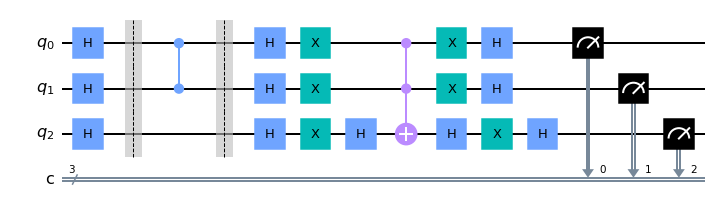

In [5]:
circ = QuantumCircuit(3,3)
circ.h(range(3))
circ.barrier(range(3))
circ = circ + Detector
circ.barrier(range(3))
circ = circ + Grover
circ.measure(range(3), range(3))
circ.draw()

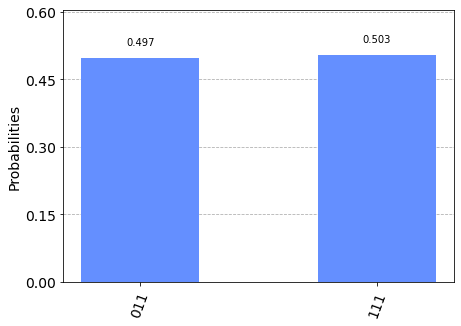

In [6]:
backend = Aer.get_backend("qasm_simulator")
job = execute(circ, backend, shots = 1000)
result = job.result()
count = result.get_counts(circ)
plot_histogram(count)